# Comparison of `bowtie`, `bowtie2`, and `kallisto`

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Data preparation

We will use some of Ben's Sjorgrens data for this.  We will generate a random sample of 1 million reads from the full data set.

Prepare data with Snakemake

```bash
snakemake -s aligners.snakefile
```

It appears that kallisto needs at least 51 bases of the reference to successfully align most of the reads.  Must be some kind of off-by-one issue with the data structures.

Load alignments

In [5]:
names = ['QNAME', 'FLAG', 'RNAME', 'POS', 'MAPQ', 'CIGAR', 'RNEXT', 'PNEXT', 'TLEN', 'SEQ', 'QUAL']

In [20]:
bowtie_alns = pd.read_csv('alns/bowtie-51mer.aln', sep='\t', header=None, usecols=list(range(11)), names=names)
bowtie2_alns = pd.read_csv('alns/bowtie2-51mer.aln', sep='\t', header=None, usecols=list(range(11)), names=names)
kallisto_alns = pd.read_csv('alns/kallisto-51mer.sam', sep='\t', header=None, usecols=list(range(11)), names=names, comment='@')

In [21]:
(bowtie_alns.RNAME != '*').sum() / len(bowtie_alns)

0.73175699999999999

In [22]:
(bowtie2_alns.RNAME != '*').sum() / len(bowtie2_alns)

0.81860999999999995

In [23]:
(kallisto_alns.RNAME != '*').sum() / len(kallisto_alns)

0.75900699999999999

## Bowtie2 vs kallisto

In [29]:
bt2_k_joined = pd.merge(bowtie2_alns, kallisto_alns, how='inner', on='QNAME', suffixes=['_bt2', '_k'])

How many reads do bowtie2 and kallisto agree on?

In [31]:
(bt2_k_joined.RNAME_bt2 == bt2_k_joined.RNAME_k).sum()

920029

In [43]:
For the minority of reads they disagree on, what do they look like?

Object `like` not found.


For the minority of reads they disagree on, what do they look like

In [40]:
bt2_k_joined[bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k].RNAME_k

9                                      *
28                                     *
43                                     *
67                                     *
72                                     *
95                                     *
97                                     *
108                                    *
113                                    *
148                                    *
149                                    *
159                                    *
179                                    *
232       hblOligo171177|NM_001102386|2B
242                                    *
247                                    *
259                                    *
276                                    *
314                                    *
329                                    *
332                                    *
341                                    *
384                                    *
392                                    *
399             

Mostly lower sensitivity of kallisto due to indels in the read.  Specifically, out of

In [45]:
(bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k).sum()

79971

discordant reads, the number where kallisto failed to map is

In [46]:
(bt2_k_joined[bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k].RNAME_k == '*').sum()

69787

or as a fraction

In [49]:
(bt2_k_joined[bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k].RNAME_k == '*').sum() / (bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k).sum()

0.87265383701591825

Are there any cases where bowtie2 fails to align

In [50]:
(bt2_k_joined[bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k].RNAME_bt2 == '*').sum()

10184

Which means **there are no cases where bowtie and kallisto align to different peptides**.

In [57]:
((bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k) & (bt2_k_joined.RNAME_bt2 != '*') & (bt2_k_joined.RNAME_k != '*')).sum()

0

What do examples look like of kallisto aligning and bowtie2 not?

In [59]:
bt2_k_joined[(bt2_k_joined.RNAME_bt2 != bt2_k_joined.RNAME_k) & (bt2_k_joined.RNAME_bt2 == '*')]

,QNAME,FLAG_bt2,RNAME_bt2,POS_bt2,MAPQ_bt2,CIGAR_bt2,RNEXT_bt2,PNEXT_bt2,TLEN_bt2,SEQ_bt2,...,FLAG_k,RNAME_k,POS_k,MAPQ_k,CIGAR_k,RNEXT_k,PNEXT_k,TLEN_k,SEQ_k,QUAL_k
232,D00542:238:C9N7UANXX:5:2302:8303:4212,4,*,0,0,*,*,0,0,AAATCCACCATTGTGAAGCAGATGAAGATCATTCATGGTTACTCAG...,...,0,hblOligo171177|NM_001102386|2B,1,255,50M,*,0,0,AAATCCACCATTGTGAAGCAGATGAAGATCATTCATGGTTACTCAG...,CCCCCGGGGGGGGGGGGGGGGGEGGGGGGGGGGGGGGGGGGGGGGG...
523,D00542:238:C9N7UANXX:5:2302:11114:7010,4,*,0,0,*,*,0,0,CTGGCCTTCTTTGACGATTGTATTGAAAAGCTTTTCCCAACAGAAA...,...,0,hblOligo157434|NM_017925|10B,1,255,50M,*,0,0,CTGGCCTTCTTTGACGATTGTATTGAAAAGCTTTTCCCAACAGAAA...,CBCCCGGGGCFGGGGGGGEFBGCGGGGGGGGGGFGFGGGGGGGGGG...
569,D00542:238:C9N7UANXX:5:2302:9302:7847,4,*,0,0,*,*,0,0,GGTCCTCACGCCGCCCGCGTTCGCGGGTTGGCATTACAATCCGCTT...,...,0,hblOligo181715|NM_001145304|6B,1,255,50M,*,0,0,GGTCCTCACGCCGCCCGCGTTCGCGGGTTGGCATTACAATCCGCTT...,CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...
671,D00542:238:C9N7UANXX:5:2302:8540:8897,4,*,0,0,*,*,0,0,GGCTCTGGTAAGTCAAAACACTCTTCTCCTCACATTCCCTAGTTCC...,...,0,hblOligo19065|NM_058241|13A,1,255,50M,*,0,0,GGCTCTGGTAAGTCAAAACACTCTTCTCCTCACATTCCCTAGTTCC...,CCCCCGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGG...
708,D00542:238:C9N7UANXX:5:2302:6508:9139,4,*,0,0,*,*,0,0,GAGAAGGGTTCTCTCTCTGACTTTCTGAAAGCAAATGGGAATGAAC...,...,0,hblOligo1809|NM_001616|7A,1,255,50M,*,0,0,GAGAAGGGTTCTCTCTCTGACTTTCTGAAAGCAAATGGGAATGAAC...,CBBCCGGGGGGGGGGGGGGGGGGGGGGGFFGGEGGGGGGGGGGGGE...
774,D00542:238:C9N7UANXX:5:2302:12874:9719,4,*,0,0,*,*,0,0,AACCTTATTGCACCATGTAACGCTAATTGCAATTGCATTCGCAGGT...,...,0,hblOligo228923|NM_180991|12B,1,255,50M,*,0,0,AACCTTATTGCACCATGTAACGCTAATTGCAATTGCATTCGCAGGT...,?ABBBGGGGGGGEGBGEGGGGGGGDGGGGGGGGGGGFGGGG<GGGG...
818,D00542:238:C9N7UANXX:5:2302:12576:10241,4,*,0,0,*,*,0,0,ACTCAGCAGACAGTCAATGATTCCCTCTGCGATGCTTGTAATACAG...,...,0,hblOligo133592|NM_207517|16B,1,255,50M,*,0,0,ACTCAGCAGACAGTCAATGATTCCCTCTGCGATGCTTGTAATACAG...,CCCCCGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...
854,D00542:238:C9N7UANXX:5:2302:13690:10377,4,*,0,0,*,*,0,0,CTCAGTAAGATTAAGGGGGTGGAAGAGGAGGTTTTGAACATGATGC...,...,0,hblOligo148091|NM_144978|6B,1,255,50M,*,0,0,CTCAGTAAGATTAAGGGGGTGGAAGAGGAGGTTTTGAACATGATGC...,CCCCCGGGGGGGGGGGGGGEEGFGGGGGGGGGGGGGGGGGGGGGGG...
1001,D00542:238:C9N7UANXX:5:2302:15849:11668,4,*,0,0,*,*,0,0,ATCCCTCGCAAACGCAAGAACTCTATGAAAGTGCACAGCTGCAGGC...,...,0,hblOligo130229|NM_001033723|5A,1,255,50M,*,0,0,ATCCCTCGCAAACGCAAGAACTCTATGAAAGTGCACAGCTGCAGGC...,CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...
1156,D00542:238:C9N7UANXX:5:2302:7457:13233,4,*,0,0,*,*,0,0,ATCCCTCTCGGGTCACTGGGCTGGAAAACCGTCAACCAGTCTACGT...,...,0,hblOligo203366|NM_005002|6B,1,255,50M,*,0,0,ATCCCTCTCGGGTCACTGGGCTGGAAAACCGTCAACCAGTCTACGT...,BBC


Looks like there is a perfect match to a prefix and the latter part of the read doesn't match

```
read AAATCCACCATTGTGAAGCAGATGAAGATCATTCATGGTTACTCAGAGCA
ref  AAATCCACCATTGTGAAGCAGATGAAGATCATTCATAAAAATGGTTACTCA

read GGTCCTCACGCCGCCCGCGTTCGCGGGTTGGCATTACAATCCGCTTTCCA
ref  GGTCCTCACGCCGCCCGCGTTCGCGGGTTGGCATTCCTCCCACACCAGACT
```

## Bowtie vs kallisto

In [61]:
bt_k_joined = pd.merge(bowtie_alns, kallisto_alns, how='inner', on='QNAME', suffixes=['_bt', '_k'])

How many reads do bowtie and kallisto agree on?

In [62]:
(bt_k_joined.RNAME_bt == bt_k_joined.RNAME_k).sum()

925110

For the minority of reads they disagree on, what do they look like

In [65]:
bt_k_joined[bt_k_joined.RNAME_bt != bt_k_joined.RNAME_k][['RNAME_bt', 'RNAME_k']]

,RNAME_bt,RNAME_k
20,*,hblOligo195898|NM_018050|8B
32,*,hblOligo153699|NM_153264|48B
96,*,hblOligo242494|NM_199242|18B
232,*,hblOligo171177|NM_001102386|2B
253,hblOligo49822|NM_153461|7A,*
254,hblOligo144036|NM_152769|8B,*
260,*,hblOligo124752|NM_001042424|17A
269,*,hblOligo252161|NM_001032281|1C
281,*,hblOligo38354|NM_203301|5A
316,*,hblOligo12261|NM_020193|15A


Looks like many disagreeents, but probably still few disagreements on a positive mapping.

In [66]:
(bt_k_joined.RNAME_bt != bt_k_joined.RNAME_k).sum()

74890

discordant reads, the number where kallisto failed to map is

In [67]:
(bt_k_joined[bt_k_joined.RNAME_bt != bt_k_joined.RNAME_k].RNAME_k == '*').sum()

23820

and the number where bowtie failed is

In [68]:
(bt_k_joined[bt_k_joined.RNAME_bt != bt_k_joined.RNAME_k].RNAME_bt == '*').sum()

51070

which means **there are no disagreements on mapping**.  kallisto appears to be somewhat higher sensitivity.

## Quantitation

In [4]:
bowtie_counts = pd.read_csv('counts/bowtie-51mer.tsv', sep='\t', header=0, names=['id', 'input', 'output'])
bowtie2_counts = pd.read_csv('counts/bowtie2-51mer.tsv', sep='\t', header=0, names=['id', 'input', 'output'])
kallisto_counts = pd.read_csv('counts/kallisto-51mer.tsv', sep='\t', header=0)

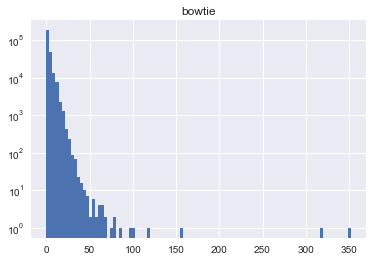

In [8]:
fig, ax = plt.subplots()
_ = ax.hist(bowtie_counts.output, bins=100, log=True)
_ = ax.set(title='bowtie')

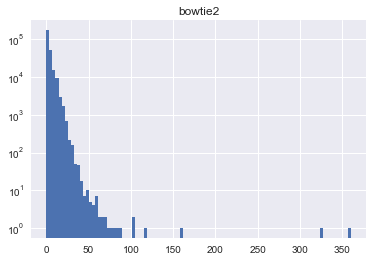

In [9]:
fig, ax = plt.subplots()
_ = ax.hist(bowtie2_counts.output, bins=100, log=True)
_ = ax.set(title='bowtie2')

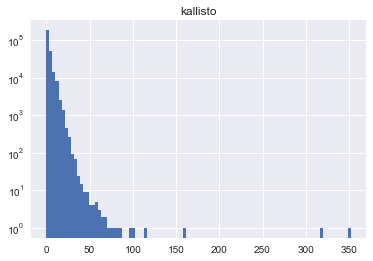

In [10]:
fig, ax = plt.subplots()
_ = ax.hist(kallisto_counts.est_counts, bins=100, log=True)
_ = ax.set(title='kallisto')

In [17]:
bt2_k_counts = pd.merge(bowtie2_counts, kallisto_counts, how='inner', left_on='id', right_on='target_id')

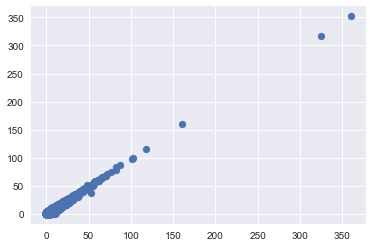

In [25]:
fig, ax = plt.subplots()
ax.scatter(bt2_k_counts.output, bt2_k_counts.est_counts)

In [28]:
sp.stats.pearsonr(bt2_k_counts.output, bt2_k_counts.est_counts)

(0.98889129323484826, 0.0)

In [30]:
sp.stats.spearmanr(bt2_k_counts.output, bt2_k_counts.est_counts)

SpearmanrResult(correlation=0.98001436308964673, pvalue=0.0)

Otherwise, the kallisto index is about 3x bigger than the bowtie indices, but kallisto (5.7 s single-threaded) is about 3.5x faster than bowtie2 (20 s) and 7.3x faster than bowtie (42 s; though still appears to be using 2 threads).

Note: it appears that kallisto needs a few extra bases on the reference to achieve its sensitivity.  Performed an analysis like so:

Looked at discordant cells according to Ben.

```python
cpm = pd.read_csv('cpm.tsv', sep='\t', index_col=0, header=0)
mlxp = pd.read_csv('mlxp.tsv', sep='\t', index_col=0, header=0)
beadsonlycols = list(filter(lambda c: 'BEADS_ONLY' in c, mlxp.columns))

samples = ['Sjogrens.serum.Sjogrens.FS08-01647.20A20G.1']

oligo1 = list(filter(lambda c: 'hblOligo32108' in c, mlxp.index))[0]  # hit for Ben
oligo2 = list(filter(lambda c: 'hblOligo223219' in c, mlxp.index))[0]  # null for Ben
oligos = [oligo1, oligo2]

print(cpm[beadsonlycols + samples].loc[oligos].to_csv(sep='\t'))
print(mlxp[beadsonlycols + samples].loc[oligos].to_csv(sep='\t'))
```

Built some indices of different sizes

```python
from Bio import SeqIO
k = 60
output = f'reference{k}.fasta'
with open(output, 'w') as op:
    for sr in SeqIO.parse('/Users/laserson/repos/phage_libraries_private/human90/human90-ref.fasta', 'fasta'):
        print(sr[:k].format('fasta'), end='', file=op)
```

```bash
kallisto index -i human90-50.idx reference50.fasta
kallisto index -i human90-51.idx reference51.fasta
kallisto index -i human90-52.idx reference52.fasta
kallisto index -i human90-55.idx reference55.fasta
kallisto index -i human90-60.idx reference60.fasta


kallisto quant -i human90-50.idx -o quant-50 --single -l 50 -s 0.1 --pseudobam Sjogrens.serum.Sjogrens.FS08-01647.20A20G.1.fastq.gz > aln-50.sam
kallisto quant -i human90-51.idx -o quant-51 --single -l 50 -s 0.1 --pseudobam Sjogrens.serum.Sjogrens.FS08-01647.20A20G.1.fastq.gz > aln-51.sam
kallisto quant -i human90-52.idx -o quant-52 --single -l 50 -s 0.1 --pseudobam Sjogrens.serum.Sjogrens.FS08-01647.20A20G.1.fastq.gz > aln-52.sam
kallisto quant -i human90-55.idx -o quant-55 --single -l 50 -s 0.1 --pseudobam Sjogrens.serum.Sjogrens.FS08-01647.20A20G.1.fastq.gz > aln-55.sam
kallisto quant -i human90-60.idx -o quant-60 --single -l 50 -s 0.1 --pseudobam Sjogrens.serum.Sjogrens.FS08-01647.20A20G.1.fastq.gz > aln-60.sam
```

Generated the following numbers of alignments

```
6,369 reads pseudoaligned
1,419,515 reads pseudoaligned
1,477,736 reads pseudoaligned
1,490,788 reads pseudoaligned
1,498,420 reads pseudoaligned
```

But looking at the results

```bash
grep hblOligo32108 quant-50/abundance.tsv
grep hblOligo32108 quant-51/abundance.tsv
grep hblOligo32108 quant-52/abundance.tsv
grep hblOligo32108 quant-55/abundance.tsv
grep hblOligo32108 quant-60/abundance.tsv
```

It was clear that at least 52 bases was necessary for the 50 base read to get max alignments for the peptides chosen.